# Simple Buy and Hold Strategy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [3]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


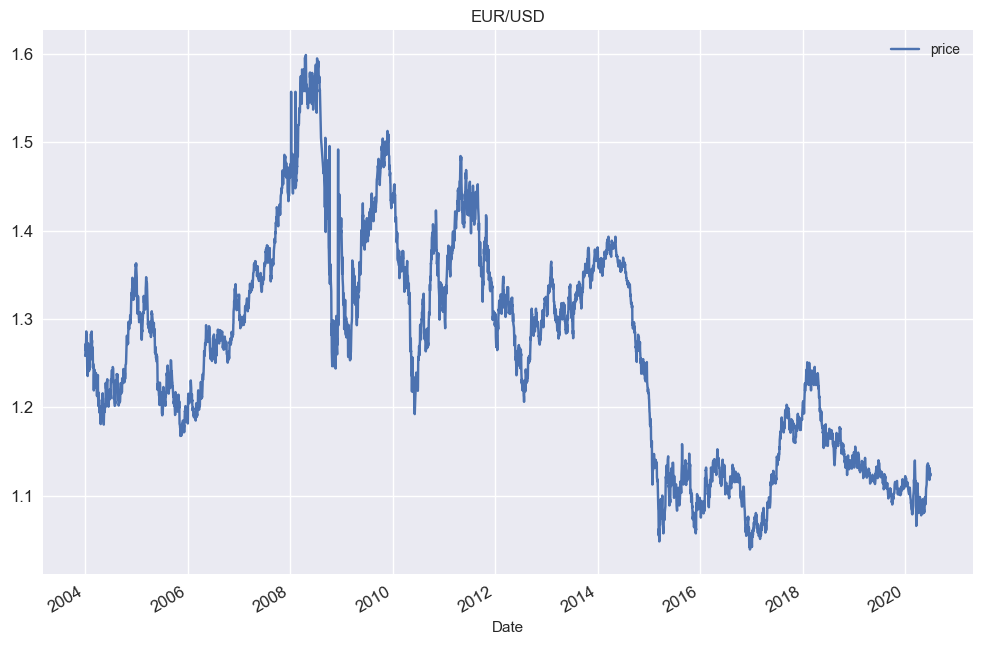

In [4]:
df.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

In [5]:
df["returns"] = np.log(df.div(df.shift(1)))

In [6]:
df

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


In [7]:
df.dropna(inplace = True)

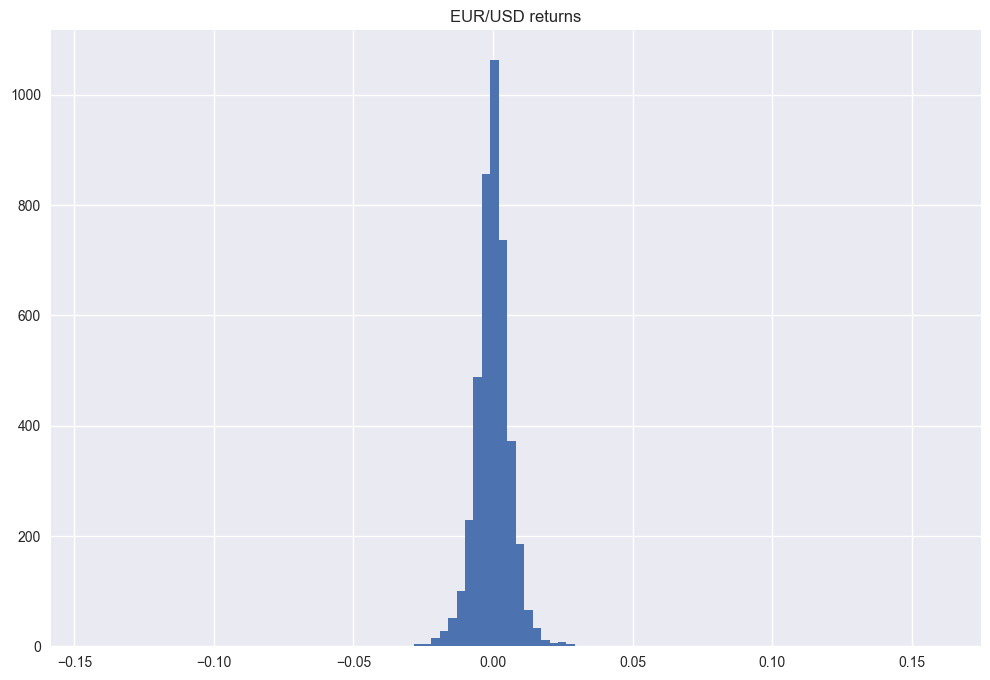

In [8]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("EUR/USD returns")
plt.show()

In [9]:
df.returns.sum()

np.float64(-0.11214302770699758)

In [10]:
np.exp(df.returns.sum())

np.float64(0.8939163935445148)

In [11]:
df.returns.cumsum().apply(np.exp)

Date
2004-01-02    1.000000
2004-01-05    1.008348
2004-01-06    1.011055
2004-01-07    1.004690
2004-01-08    1.015343
                ...   
2020-06-24    0.899094
2020-06-25    0.894208
2020-06-26    0.891920
2020-06-29    0.892221
2020-06-30    0.893916
Name: returns, Length: 4274, dtype: float64

In [12]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

In [13]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


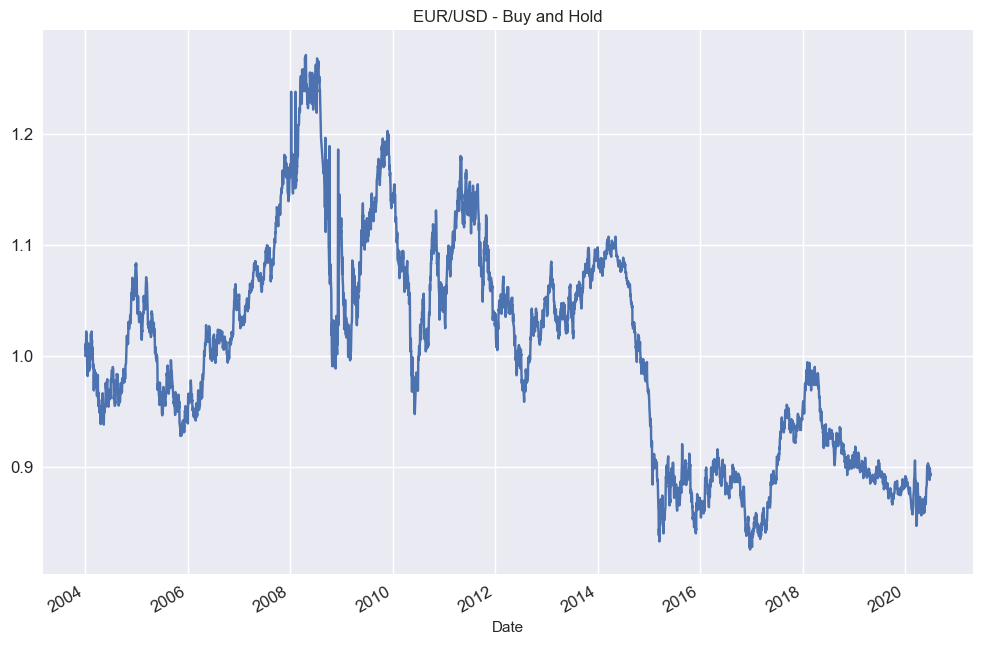

In [14]:
df.creturns.plot(figsize = (12, 8), title = "EUR/USD - Buy and Hold", fontsize = 12)
plt.show()

In [15]:
df["cummax"] = df.creturns.cummax()

In [16]:
df

,price,returns,creturns,cummax
Date,,,,
2004-01-02,1.258194,0.000000,1.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348,1.008348
2004-01-06,1.272103,0.002681,1.011055,1.011055
2004-01-07,1.264095,-0.006315,1.004690,1.011055
2004-01-08,1.277498,0.010547,1.015343,1.015343
...,...,...,...,...
2020-06-24,1.131235,0.002892,0.899094,1.270709
2020-06-25,1.125087,-0.005449,0.894208,1.270709
2020-06-26,1.122208,-0.002562,0.891920,1.270709


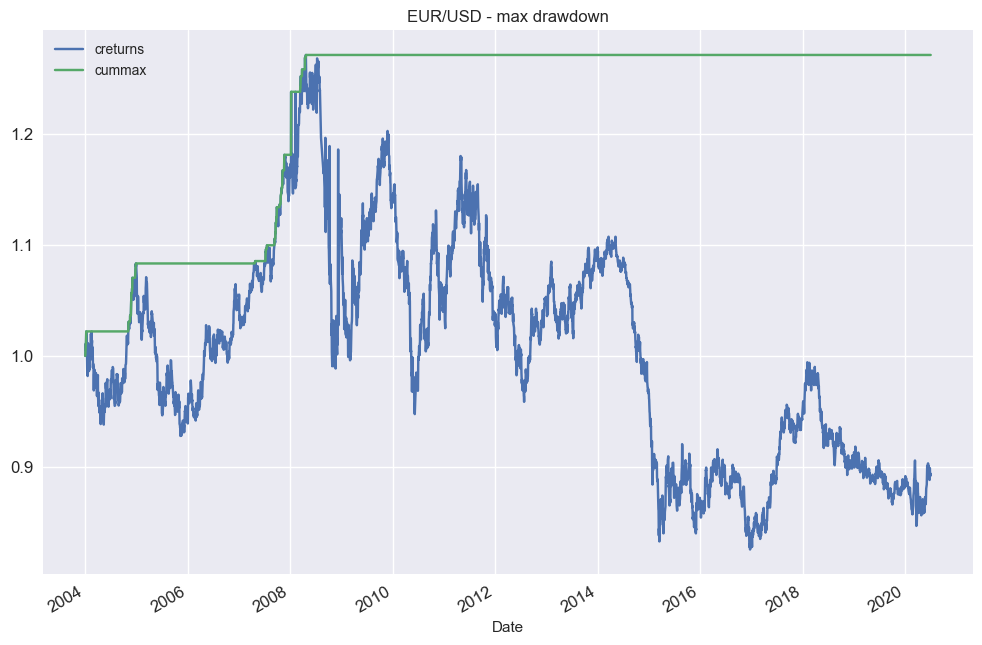

In [17]:
df[["creturns", "cummax"]].dropna().plot(figsize = (12, 8), title = "EUR/USD - max drawdown", fontsize = 12)
plt.show()

In [18]:
drawdown = df["cummax"] - df["creturns"]
drawdown

Date
2004-01-02    0.000000
2004-01-05    0.000000
2004-01-06    0.000000
2004-01-07    0.006365
2004-01-08    0.000000
                ...   
2020-06-24    0.371615
2020-06-25    0.376500
2020-06-26    0.378788
2020-06-29    0.378488
2020-06-30    0.376792
Length: 4274, dtype: float64

In [19]:
drawdown.max() 

np.float64(0.4448840569933439)

In [20]:
drawdown.idxmax()

Timestamp('2016-12-21 00:00:00')